In [28]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

with open('../experiments/baseline/checkpoints.json', 'r') as f:
    checkpoints = json.load(f)
train_loss_baseline = {k:v for x in checkpoints for k,v in x['train_loss'].items() }
val_loss_baseline = {x['step']:x['val_loss'] for x in checkpoints}


with open('../experiments/inc_max_lr/checkpoints.json', 'r') as f:
    checkpoints = json.load(f)
train_loss_inc_max_lr = {k:v for x in checkpoints for k,v in x['train_loss'].items() }
val_loss_inc_max_lr = {x['step']:x['val_loss'] for x in checkpoints}

with open('../experiments/rope/checkpoints.json', 'r') as f:
    checkpoints = json.load(f)
train_loss_rope = {k:v for x in checkpoints for k,v in x['train_loss'].items() }
val_loss_rope = {x['step']:x['val_loss'] for x in checkpoints}


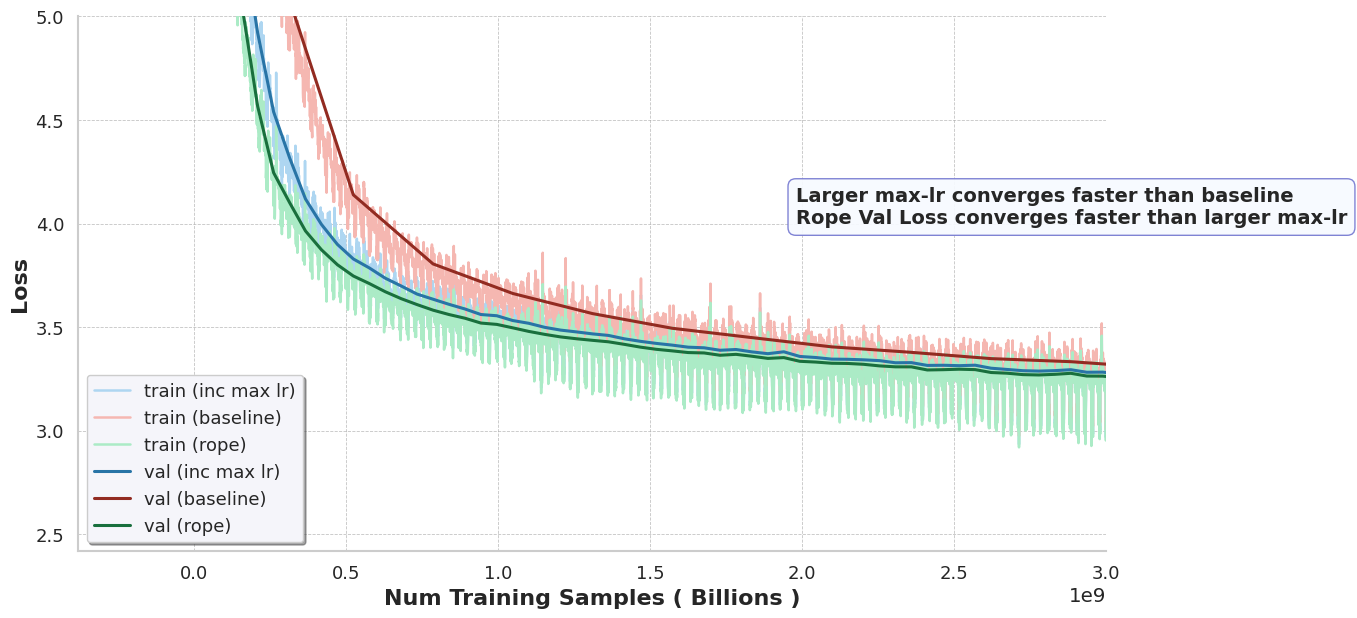

In [51]:

# Use a pretty style and larger fonts
sns.set_theme(style="whitegrid", palette="colorblind", font_scale=1.3)
plt.rcParams['axes.facecolor'] = '#f5f5fa'
plt.rcParams['figure.facecolor'] = '#f5f5fa'
plt.rcParams['axes.edgecolor'] = '#cccccc'
plt.rcParams['axes.linewidth'] = 1.5

# Number of samples per step
samples_per_step = 524288

# Prepare INC_MAX_LR train loss data for plotting
inc_steps = list(map(int, train_loss_inc_max_lr.keys()))
inc_losses = list(train_loss_inc_max_lr.values())
sorted_inc_steps_losses = sorted(zip(inc_steps, inc_losses))
sorted_inc_steps, sorted_inc_losses = zip(*sorted_inc_steps_losses)
sorted_inc_samples = [step * samples_per_step for step in sorted_inc_steps]

# Prepare INC_MAX_LR val loss data for plotting
val_inc_steps = sorted(val_loss_inc_max_lr.keys())
val_inc_losses = [val_loss_inc_max_lr[step] for step in val_inc_steps]
val_inc_samples = [step * samples_per_step for step in val_inc_steps]

# Prepare BASELINE train loss data
baseline_steps = list(map(int, train_loss_baseline.keys()))
baseline_losses = list(train_loss_baseline.values())
sorted_base_steps_losses = sorted(zip(baseline_steps, baseline_losses))
sorted_base_steps, sorted_base_losses = zip(*sorted_base_steps_losses)
sorted_base_samples = [step * samples_per_step for step in sorted_base_steps]

# Prepare BASELINE val loss data
val_base_steps = sorted(val_loss_baseline.keys())
val_base_losses = [val_loss_baseline[step] for step in val_base_steps]
val_base_samples = [step * samples_per_step for step in val_base_steps]

# Prepare ROPE train loss data
rope_steps = list(map(int, train_loss_rope.keys()))
rope_losses = list(train_loss_rope.values())
sorted_rope_steps_losses = sorted(zip(rope_steps, rope_losses))
sorted_rope_steps, sorted_rope_losses = zip(*sorted_rope_steps_losses)
sorted_rope_samples = [step * samples_per_step for step in sorted_rope_steps]

# Prepare ROPE val loss data
val_rope_steps = sorted(val_loss_rope.keys())
val_rope_losses = [val_loss_rope[step] for step in val_rope_steps]
val_rope_samples = [step * samples_per_step for step in val_rope_steps]

fig, ax = plt.subplots(figsize=(12, 7))

# Plot train loss for inc_max_lr, baseline, and rope, using light colors
sns.lineplot(x=sorted_inc_samples, y=sorted_inc_losses, label='train (inc max lr)', ax=ax, linewidth=1.8, color='#AED6F1')
sns.lineplot(x=sorted_base_samples, y=sorted_base_losses, label='train (baseline)', ax=ax, linewidth=1.8, color='#F5B7B1')
sns.lineplot(x=sorted_rope_samples, y=sorted_rope_losses, label='train (rope)', ax=ax, linewidth=1.8, color='#ABEBC6')

# Plot val loss as points and step line for inc_max_lr, baseline, and rope (darker, higher contrast)
sns.lineplot(x=val_inc_samples, y=val_inc_losses, label='val (inc max lr)', ax=ax, linewidth=2.2, color='#2874A6')
sns.lineplot(x=val_base_samples, y=val_base_losses, label='val (baseline)', ax=ax, linewidth=2.2, color='#922B21')
sns.lineplot(x=val_rope_samples, y=val_rope_losses, label='val (rope)', ax=ax, linewidth=2.2, color='#196F3D')

ax.set_xlabel('Num Training Samples ( Billions )', fontsize=16, fontweight='semibold')
ax.set_ylabel('Loss', fontsize=16, fontweight='semibold')
ax.set_title('', fontsize=19, fontweight='bold', pad=18)
ax.legend(frameon=True, fancybox=True, shadow=True, fontsize=13)
ax.grid(True, which='major', linestyle='--', linewidth=0.6, color='#aaaaaa', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=13)
sns.despine(ax=ax, top=True, right=True)
plt.tight_layout(pad=2.5)

# ZOOM: set y axis to only show loss below 7
ax.set_ylim(bottom=None, top=5)
ax.set_xlim(right=3e9)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)


# Add a callout box to highlight the val loss ordering:
# Rope achieves better val loss than INC_MAX_LR which achieves better val loss than baseline.
# We'll place the annotation at a suitable position near the best val loss.

# Find the minimum val loss for each run to place the annotation near there
min_val_rope = min(val_rope_losses)
min_val_inc = min(val_inc_losses)
min_val_base = min(val_base_losses)

# Move callout to the middle of x and closer to center y for better visibility
x_callout = (max(val_base_samples) + min(val_base_samples)) / 4
all_val_losses = val_base_losses + val_inc_losses + val_rope_losses
y_callout = 4

callout_text = (
    "Larger max-lr converges faster than baseline\n"
    "Rope Val Loss converges faster than larger max-lr"
)

ax.annotate(
    callout_text, 
    xy=(x_callout, y_callout), 
    xycoords='data', 
    fontsize=14, 
    fontweight='semibold',
    bbox=dict(boxstyle='round,pad=0.4', fc='#f7faff', ec='#777bd2', alpha=0.93)
)

plt.show()
